In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline

directory = "../../data/pxd025560/"
file = directory+"pxd025560.report.tsv"

In [2]:
df = pd.read_csv(file, sep = "\t")
df = df.sort_values(by = "PEP")

df.sort_values("CScore", ascending = False, inplace = True)
df["decoy_hit"] = df["Protein.Ids"].str.contains("Random")
df["target_hit"] = ~df["Protein.Ids"].str.contains("Random")
df["decoy_cumsum"] = df.decoy_hit.cumsum()
df["target_cumsum"] = df.target_hit.cumsum()

df["fdrTargetDecoy"] = df["decoy_cumsum"]/df["target_cumsum"] #Entrapment FDR 

In [3]:
# calculate PEP from Q.Value
x = df.PEP.reset_index().drop("index", axis = 1)
y = df["Q.Value"].reset_index().drop("index", axis = 1)*x.values
f = InterpolatedUnivariateSpline(x, y, k=1)
dfdx = f.derivative()
deriv = pd.DataFrame(dfdx(x), columns = ["PEP_calculated"])
pep_calc = deriv.rename({})

In [4]:
# Calculate q-value from PEP
PEP = df["PEP"].reset_index().drop("index", axis = 1).reset_index()
PEP_sum = PEP.cumsum()
PEP["Q_calculated"] = PEP_sum.PEP / (PEP_sum.index+1)
df.reset_index(inplace = True)
res = pd.concat([df["Protein.Ids"], df["Stripped.Sequence"], PEP, pep_calc, df.iloc[:,df.columns.str.contains("Q.Value")]], axis = 1)
res["fdrTargetDecoy"] = df["fdrTargetDecoy"] 

In [5]:
res

,Protein.Ids,Stripped.Sequence,index,PEP,Q_calculated,PEP_calculated,Q.Value,Global.Q.Value,Protein.Q.Value,PG.Q.Value,Global.PG.Q.Value,GG.Q.Value,Translated.Q.Value,Lib.Q.Value,Lib.PG.Q.Value,fdrTargetDecoy
0,Q9UKK3,QLLGLQPISTVSPLHR,0,0.000000,0.000000,NaN,1.000000e-09,0.001919,0.000397,0.000550,0.000583,0.000550,0,0.000215,0.001397,0.000000
1,O60568,LTHYHEGLPTTWGTR,1,0.000000,0.000000,NaN,1.000000e-09,0.006978,0.000397,0.000550,0.000558,0.000550,0,0.001180,0.000958,0.000000
2,P78347,RPELLTHSTTEVTQPR,2,0.000000,0.000000,NaN,1.000000e-09,0.000056,0.000397,0.000550,0.000558,0.000550,0,0.000004,0.001397,0.000000
3,P35232,NITYLPAGQSVLLQLPQ,3,0.000000,0.000000,NaN,1.000000e-09,0.001919,0.000397,0.000550,0.000558,0.000550,0,0.000215,0.001397,0.000000
4,O94973,FVNLFPEVKPTIQDVLR,4,0.000000,0.000000,NaN,1.000000e-09,0.001919,0.000397,0.000550,0.000558,0.000550,0,0.000145,0.001397,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322367,Q9NPF5,DILELGGPEGDAASGTISK,1322367,0.563934,0.028895,0.009998,9.998306e-03,0.004102,0.000397,0.000944,0.000583,0.000913,0,0.000294,0.001321,0.030064
1322368,Q96JH7,TIQQNITEQASVMQK,1322368,0.564044,0.028895,0.009998,9.998306e-03,0.006978,0.000397,0.000550,0.000558,0.000550,0,0.001309,0.000587,0.030064
1322369,Random_19301,QPPCTPSRQPPCTPSR,1322369,0.564333,0.028896,0.009998,9.998306e-03,0.062165,1.000000,0.029397,1.000000,1.000000,0,0.003276,0.006839,0.030064
1322370,Q14204,TPVIDADKPVSSQLR,1322370,0.564506,0.028896,0.009998,9.998306e-03,0.003976,0.000397,0.000550,0.000558,0.000550,0,0.000116,0.000646,0.030064


In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [7]:
round(res["Q_calculated"].corr(res["Q.Value"]), 2)

round(res["Q_calculated"].corr(res["Q.Value"], method = "spearman"), 2)

0.92

/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by c

Text(0.5, 1.0, 'Pearson 0.99; Spearman 1.0')

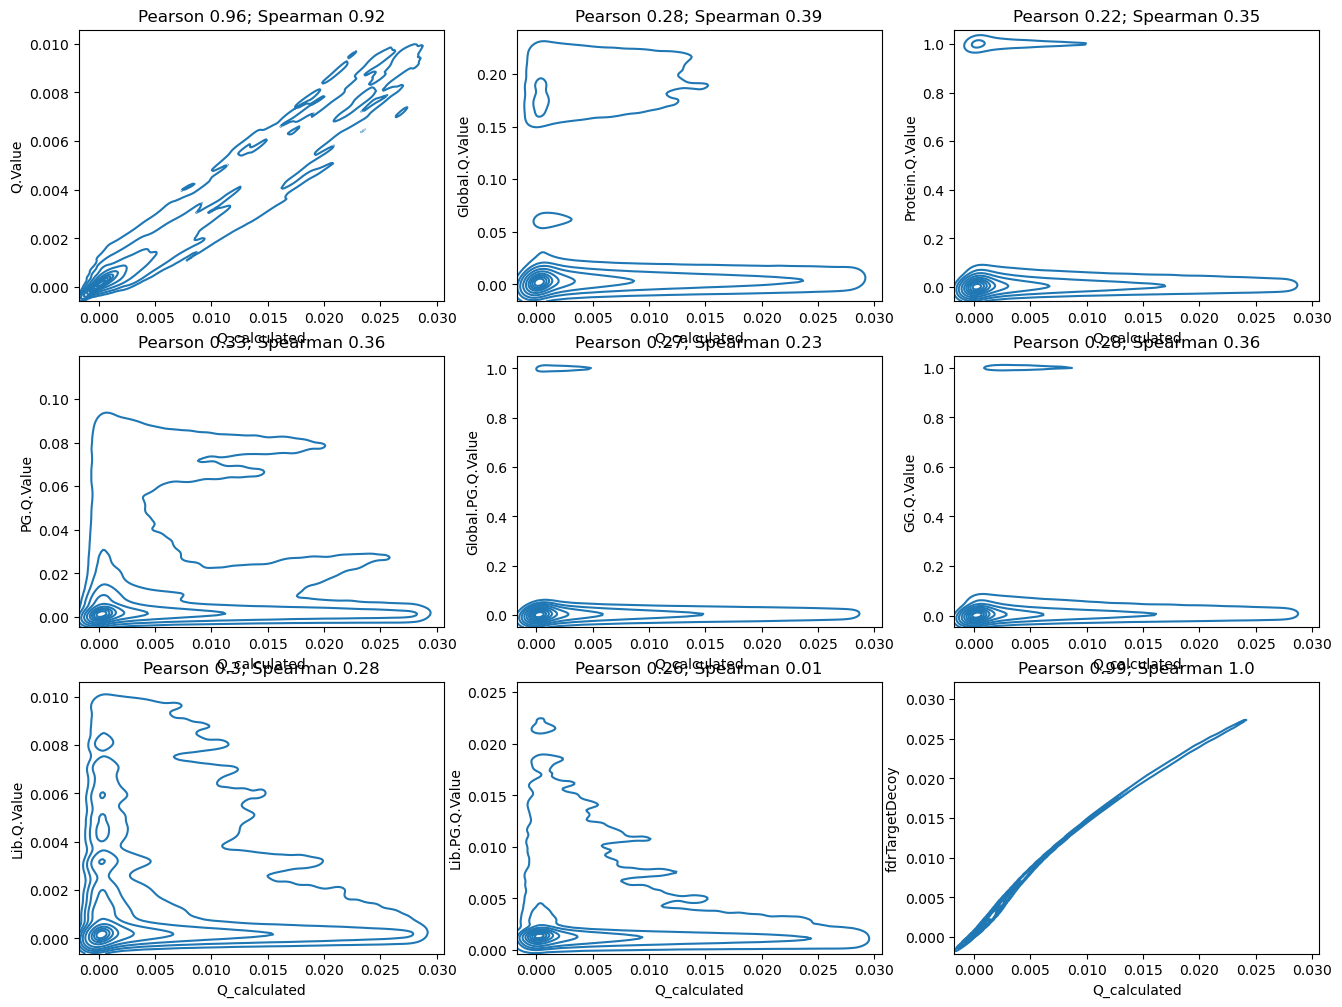

In [10]:
fig2 = plt.figure(figsize=(16, 12))
spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])
f2_ax7 = fig2.add_subplot(spec2[2, 0])
f2_ax8 = fig2.add_subplot(spec2[2, 1])
f2_ax9 = fig2.add_subplot(spec2[2, 2])

sns.kdeplot(data=res, x="Q_calculated", kind="hex", y="Q.Value", ax = f2_ax1).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="Q_calculated", kind="hex", y="Global.Q.Value", ax = f2_ax2).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Global.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Global.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="Q_calculated", kind="hex", y="Protein.Q.Value", ax = f2_ax3).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Protein.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Protein.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="Q_calculated", kind="hex", y="PG.Q.Value", ax = f2_ax4).set_title(f'Pearson {round(res["Q_calculated"].corr(res["PG.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["PG.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="Q_calculated", kind="hex", y="Global.PG.Q.Value", ax = f2_ax5).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Global.PG.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Global.PG.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="Q_calculated", kind="hex", y="GG.Q.Value", ax = f2_ax6).set_title(f'Pearson {round(res["Q_calculated"].corr(res["GG.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["GG.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="Q_calculated", kind="hex", y="Lib.Q.Value", ax = f2_ax7).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Lib.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Lib.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="Q_calculated", kind="hex", y="Lib.PG.Q.Value", ax = f2_ax8).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Lib.PG.Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Lib.PG.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="Q_calculated", kind="hex", y="fdrTargetDecoy", ax = f2_ax9).set_title(f'Pearson {round(res["Q_calculated"].corr(res["fdrTargetDecoy"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["fdrTargetDecoy"], method = "spearman"), 2)}')

#sns.lineplot(data=res, x="Q_calculated", y="Q.Value", ax = f2_ax9).set_title(f'Pearson {round(res["Q_calculated"].corr(res["Q.Value"]), 2)}; Spearman {round(res["Q_calculated"].corr(res["Q.Value"], method = "spearman"), 2)}')


#sns.jointplot(x=x, y=y, kind="hex", coor="#4CB391")


/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(
/home/ptruong/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by c

Text(0.5, 1.0, 'Pearson 0.99; Spearman 1.0')

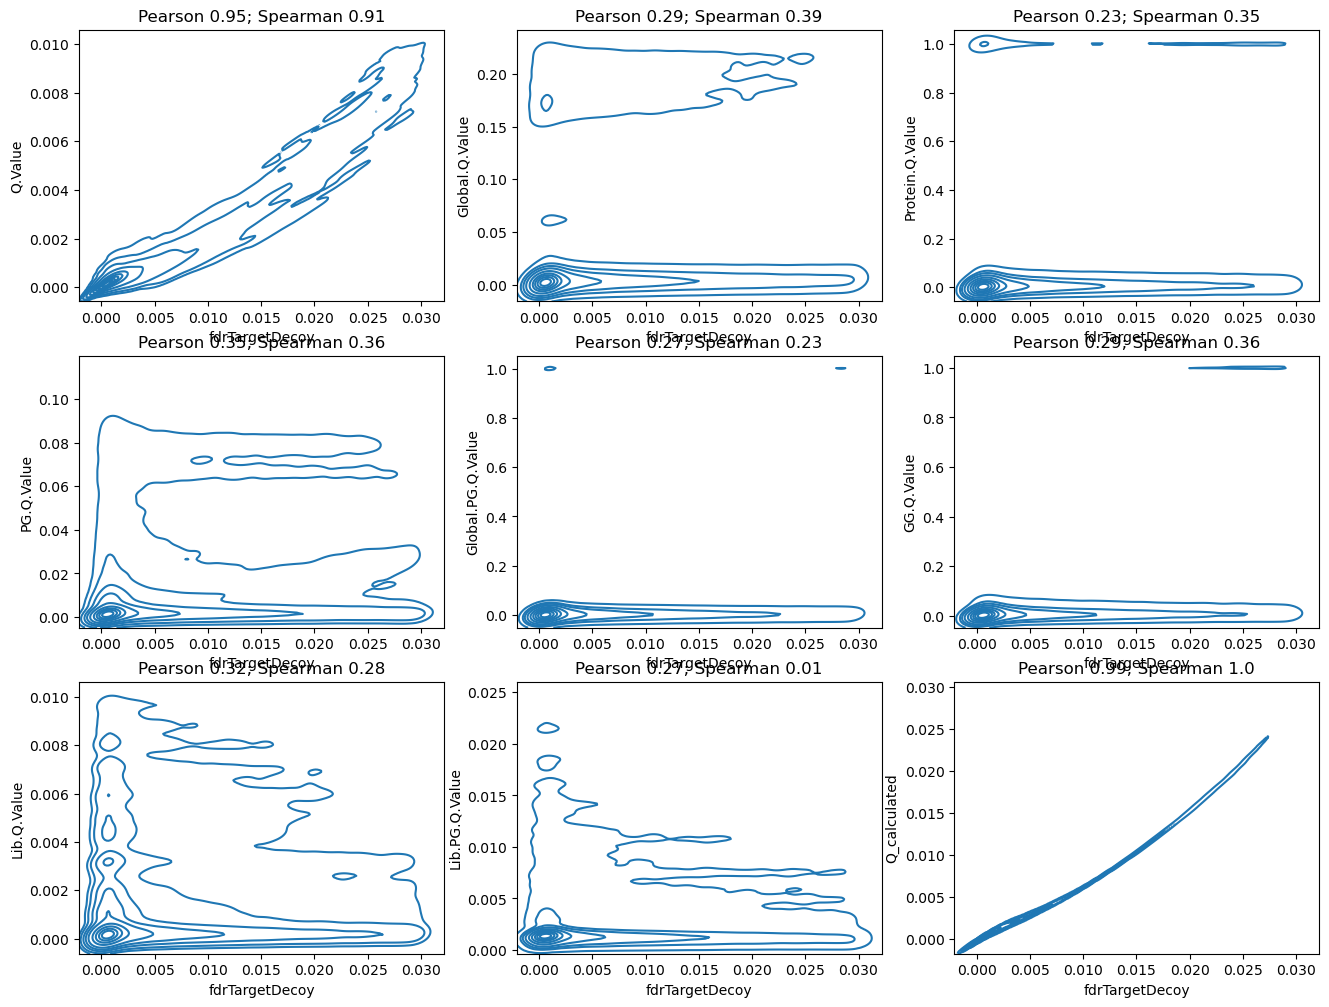

In [11]:
fig2 = plt.figure(figsize=(16, 12))
spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])
f2_ax4 = fig2.add_subplot(spec2[1, 0])
f2_ax5 = fig2.add_subplot(spec2[1, 1])
f2_ax6 = fig2.add_subplot(spec2[1, 2])
f2_ax7 = fig2.add_subplot(spec2[2, 0])
f2_ax8 = fig2.add_subplot(spec2[2, 1])
f2_ax9 = fig2.add_subplot(spec2[2, 2])

sns.kdeplot(data=res, x="fdrTargetDecoy", kind="hex", y="Q.Value", ax = f2_ax1).set_title(f'Pearson {round(res["fdrTargetDecoy"].corr(res["Q.Value"]), 2)}; Spearman {round(res["fdrTargetDecoy"].corr(res["Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="fdrTargetDecoy", kind="hex", y="Global.Q.Value", ax = f2_ax2).set_title(f'Pearson {round(res["fdrTargetDecoy"].corr(res["Global.Q.Value"]), 2)}; Spearman {round(res["fdrTargetDecoy"].corr(res["Global.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="fdrTargetDecoy", kind="hex", y="Protein.Q.Value", ax = f2_ax3).set_title(f'Pearson {round(res["fdrTargetDecoy"].corr(res["Protein.Q.Value"]), 2)}; Spearman {round(res["fdrTargetDecoy"].corr(res["Protein.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="fdrTargetDecoy", kind="hex", y="PG.Q.Value", ax = f2_ax4).set_title(f'Pearson {round(res["fdrTargetDecoy"].corr(res["PG.Q.Value"]), 2)}; Spearman {round(res["fdrTargetDecoy"].corr(res["PG.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="fdrTargetDecoy", kind="hex", y="Global.PG.Q.Value", ax = f2_ax5).set_title(f'Pearson {round(res["fdrTargetDecoy"].corr(res["Global.PG.Q.Value"]), 2)}; Spearman {round(res["fdrTargetDecoy"].corr(res["Global.PG.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="fdrTargetDecoy", kind="hex", y="GG.Q.Value", ax = f2_ax6).set_title(f'Pearson {round(res["fdrTargetDecoy"].corr(res["GG.Q.Value"]), 2)}; Spearman {round(res["fdrTargetDecoy"].corr(res["GG.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="fdrTargetDecoy", kind="hex", y="Lib.Q.Value", ax = f2_ax7).set_title(f'Pearson {round(res["fdrTargetDecoy"].corr(res["Lib.Q.Value"]), 2)}; Spearman {round(res["fdrTargetDecoy"].corr(res["Lib.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="fdrTargetDecoy", kind="hex", y="Lib.PG.Q.Value", ax = f2_ax8).set_title(f'Pearson {round(res["fdrTargetDecoy"].corr(res["Lib.PG.Q.Value"]), 2)}; Spearman {round(res["fdrTargetDecoy"].corr(res["Lib.PG.Q.Value"], method = "spearman"), 2)}')
sns.kdeplot(data=res, x="fdrTargetDecoy", kind="hex", y="Q_calculated", ax = f2_ax9).set_title(f'Pearson {round(res["fdrTargetDecoy"].corr(res["Q_calculated"]), 2)}; Spearman {round(res["fdrTargetDecoy"].corr(res["Q_calculated"], method = "spearman"), 2)}')
